Put netcdf files of the same case to folder so that they can be read in together.
And plot some slices.

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
plt.style.use('../grl.mplstyle')
import os
os.environ['PATH'] = os.environ['PATH'] + ':/Library/TeX/texbin/'
import numpy as np
import xrft
from dask.diagnostics import ProgressBar
from mlpython.utils import compute_diss

%load_ext autoreload
%autoreload 3

### Plot slices

In [ ]:
DIR = '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/'
t = 120 

ds1 = xr.open_dataset(DIR + 'C4_NL30/' + 'field%g.nc' %t)
vort1 = compute_diss(ds1).omegazp.compute()
z1 = ds1.z.mean(dim=['x','y','t']).values

ds2 = xr.open_dataset(DIR + 'C1/' + 'field%g.nc' %t) 
vort2 = compute_diss(ds2).omegazp.compute()
z2 = ds2.z.mean(dim=['x','y','t']).values

# Pick the layers to plot
depth = -7
TOP1 = ds1.attrs['NL'] - 1
BOTTOM1 = np.abs(z1 - depth).argmin()
TOP2 = ds2.attrs['NL'] - 1
BOTTOM2 = np.abs(z2 - depth).argmin()
print(TOP1, BOTTOM1, TOP2, BOTTOM2)

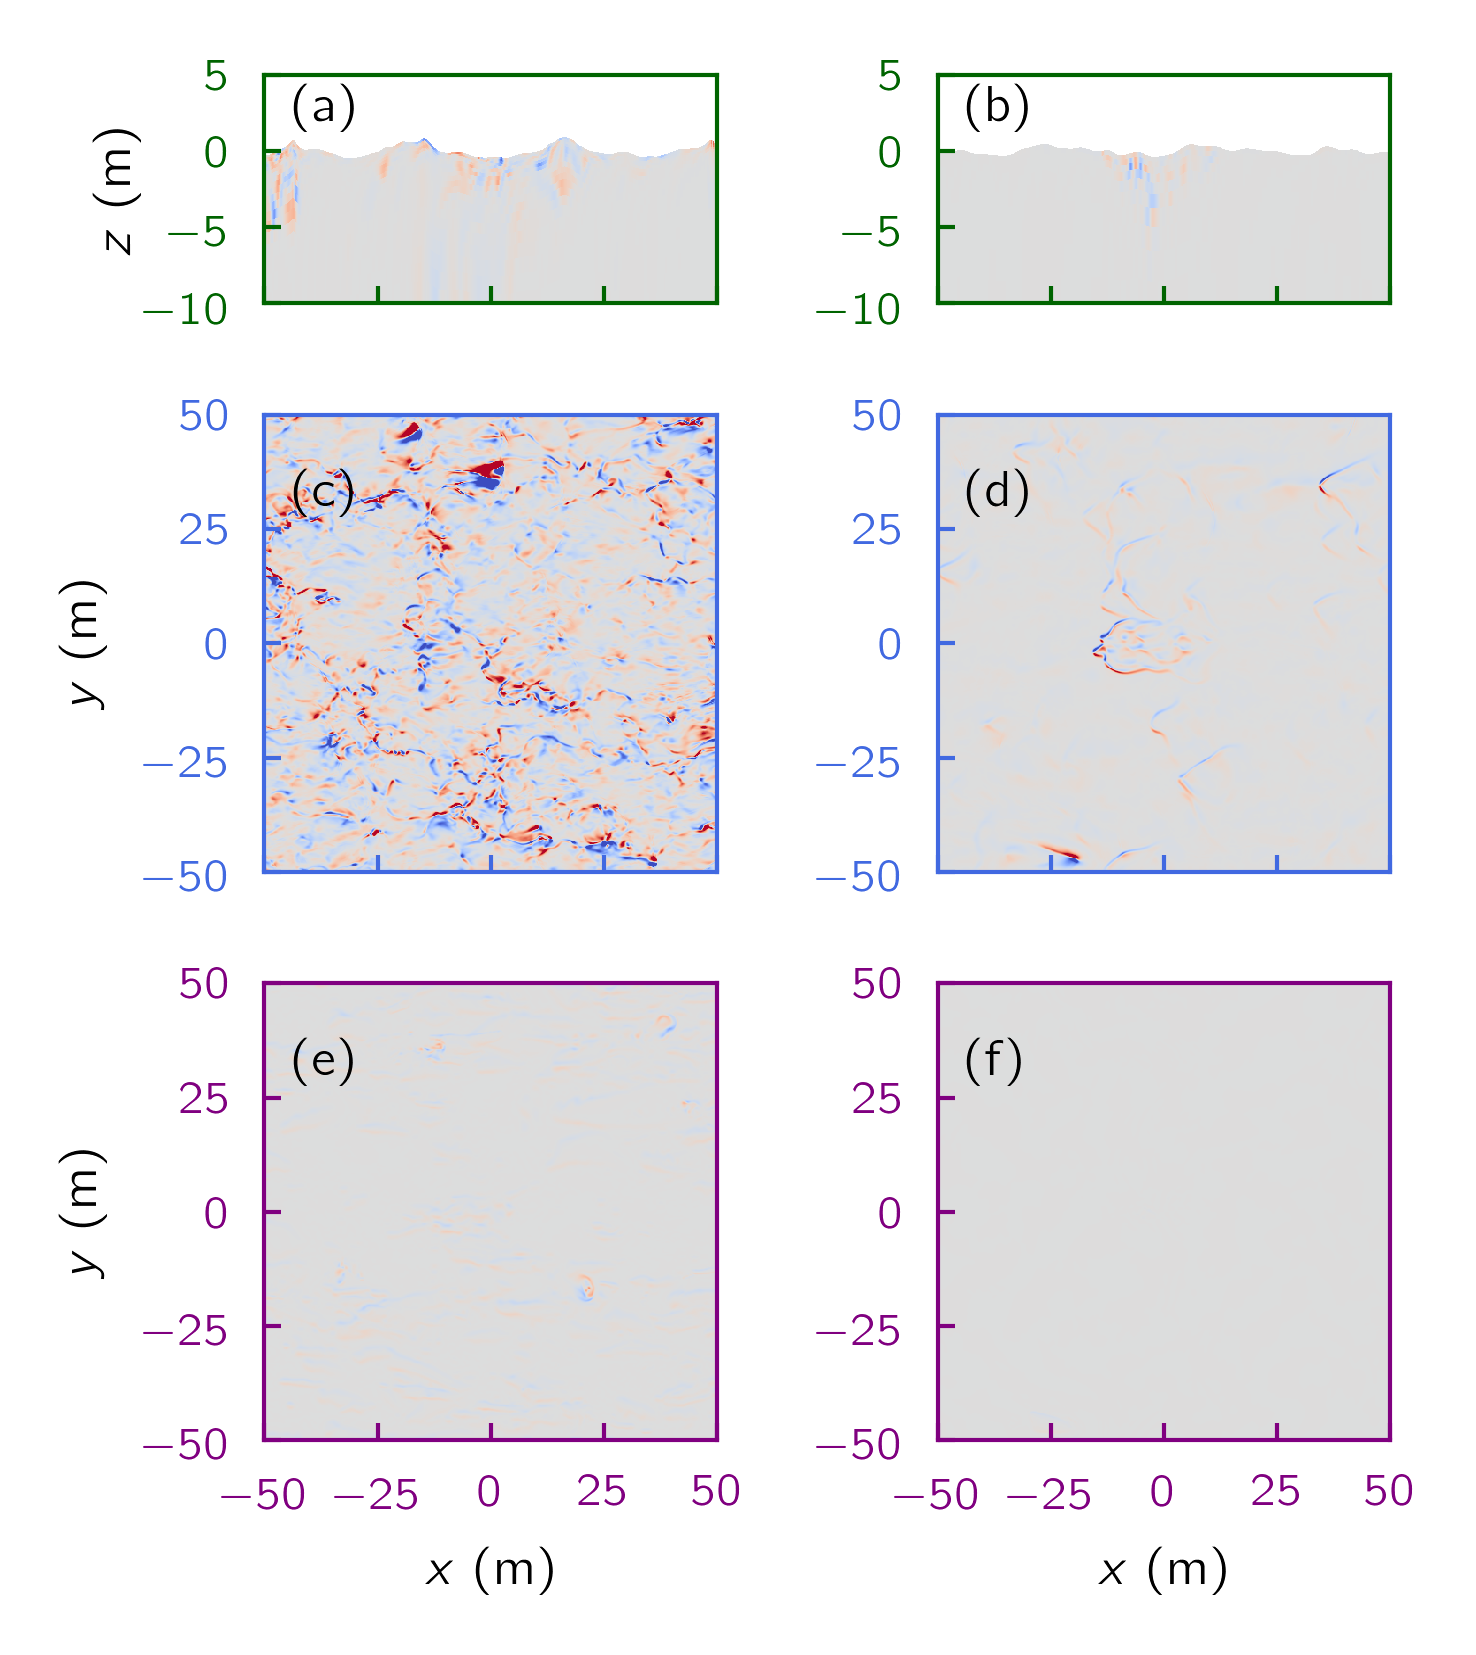

In [36]:
from helper import color_spine
from mlpython.plot import set_letters

fig, axes = plt.subplots (3, 2, figsize=[2.5,2.8], gridspec_kw={'height_ratios': [1,2,2]}, 
                          sharex=True, sharey=False); 
ax = plt.gca()
# fig.patch.set_facecolor('lightgrey')
# fig.patch.set_alpha(1)

for ax in (axes[0,0], axes[0,1]):
    color_spine(ax, 'darkgreen')
for ax in (axes[1,0], axes[1,1]):
    color_spine(ax, 'royalblue')
for ax in (axes[2,0], axes[2,1]):
    color_spine(ax, 'purple')   

vort1.isel(y=512).plot(ax=axes[0,0], x='x', y='z', xlim=[0,50], ylim=[-10,5], cmap='coolwarm',
      vmax=0.3, vmin=-0.3, add_colorbar=False) # cbar_kwargs={'label':r'$\omega_x$'}
vort1.isel(zl=TOP1).plot(ax=axes[1,0], x='x', vmax=0.3, vmin=-0.3, cmap='coolwarm', 
                        add_colorbar=False, xincrease=True, yincrease=True) 
vort1.isel(zl=BOTTOM1).plot(ax=axes[2,0], x='x', vmax=0.3, vmin=-0.3, cmap='coolwarm', 
                        add_colorbar=False, xincrease=True, yincrease=True) 

vort2.isel(y=512).plot(ax=axes[0,1], x='x', y='z', xlim=[0,50], ylim=[-10,5], cmap='coolwarm',
      vmax=0.3, vmin=-0.3, add_colorbar=False) # cbar_kwargs={'label':r'$\omega_x$'}
vort2.isel(zl=TOP2).plot(ax=axes[1,1], x='x', vmax=0.3, vmin=-0.3, cmap='coolwarm', 
                        add_colorbar=False, xincrease=True, yincrease=True) 
vort2.isel(zl=BOTTOM2).plot(ax=axes[2,1], x='x', vmax=0.3, vmin=-0.3, cmap='coolwarm', 
                        add_colorbar=False, xincrease=True, yincrease=True) 

for ax in axes.flatten():
      ax.set(xlabel=None, ylabel=None, title=None)
      ax.set_xlim([-50, 50])
      ax.set_xticks([-50,-25,0,25,50])
for ax in axes[0,:]:
      ax.set_ylim([-10, 5])
      ax.set_yticks([-10,-5,0,5])
for ax in axes[1,:]:
      ax.set_ylim([-50, 50])
      ax.set_yticks([-50,-25,0,25,50])
for ax in axes[2,:]:
      ax.set_ylim([-50, 50])
      ax.set_yticks([-50,-25,0,25,50])

axes[2,0].set_xlabel('$x$ (m)', fontsize=6)
axes[2,1].set_xlabel('$x$ (m)', fontsize=6)
axes[0,0].set_ylabel('$z$ (m)', fontsize=6, labelpad=0)
axes[1,0].set_ylabel('$y$ (m)', fontsize=6)
axes[2,0].set_ylabel('$y$ (m)', fontsize=6)

set_letters(x=0.06, y=0.8, fontsize=6, letters=['a', 'b', 'c', 'd', 'e', 'f', 'g'], color='k')

plt.tight_layout()
# Writing to pdf will take a few minutes, so by default write to png
plt.savefig('plots/vort_slices.png', bbox_inches='tight')

### Compare different resolutions

In [ ]:
DIR = '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/'
t = 120 

ds1 = xr.open_dataset(DIR + 'C4/' + 'field%g.nc' %t)
ds1 = xr.open_dataset(DIR + 'C4_NL30/' + 'field%g.nc' %t)
ds1 = xr.open_dataset(DIR + 'C4_NL45/' + 'field%g.nc' %t)

ds1 = compute_diss(ds1).compute()
ds2 = compute_diss(ds2).compute()
ds3 = compute_diss(ds3).compute()

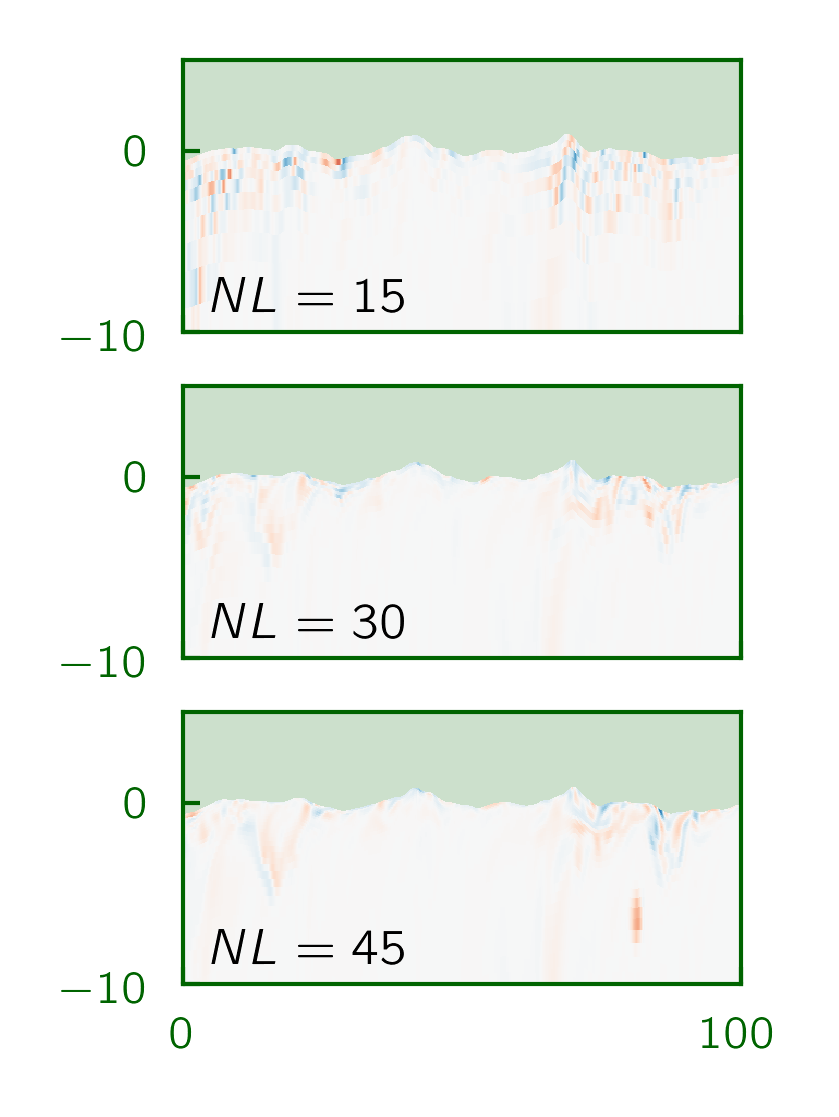

In [18]:
fig, axes = plt.subplots (3, 1, figsize=[1.2,2], sharex=True); ax = plt.gca()

c = 'darkgreen'

t = 150
NLs = [15, 30, 45]
for i, ds in enumerate((ds1,ds2,ds3)): 
    with ProgressBar():
        vort2d = compute_diss(ds.isel(t=3)).omegazp.sel(y=0, method='nearest')
    vort2d.plot(ax=axes[i], y='z', xlim=[0,100], ylim=[-10,5], cmap='RdBu_r',
                vmax=0.4, vmin=-0.4, add_colorbar=False) # cbar_kwargs={'label':r'$\omega_x$'}
    axes[i].set_yticks([-10,0]); axes[i].set_xticks([0, 100])
    axes[i].set(xlabel=None, ylabel=None, title=None)
    axes[i].spines['bottom'].set_color(c)
    axes[i].spines['top'].set_color(c)
    axes[i].spines['right'].set_color(c)
    axes[i].spines['left'].set_color(c)
    axes[i].annotate(r'$NL=%g$' %NLs[i], (5,-9), fontsize=6)   
    axes[i].set_facecolor('darkgreen')
    axes[i].patch.set_alpha(0.2)

axes[0].tick_params(axis='both', colors=c)
axes[1].tick_params(axis='both', colors=c)
axes[2].tick_params(axis='both', colors=c)

# plt.savefig('../figures/multilayer-diss/vort_side_' + ds.caselabel + '.tiff', bbox_inches='tight')

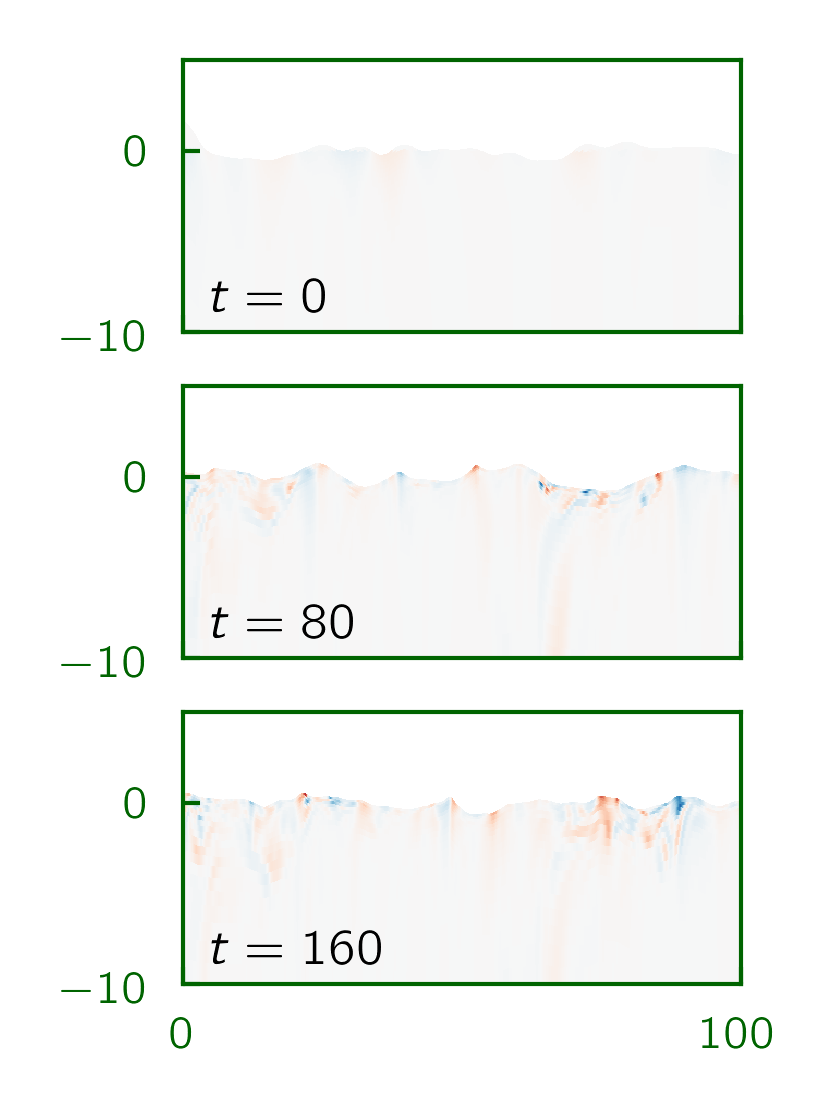

In [4]:
fig, axes = plt.subplots (3, 1, figsize=[1.2,2], sharex=True); ax = plt.gca()
c = 'darkgreen'
for i,t in enumerate((0,80,160)):    
    vort2d = ds.omegaz.sel(y=0, t=t, method='nearest')
    vort2d.plot(ax=axes[i], y='z', xlim=[0,100], ylim=[-10,5], cmap='RdBu_r',
                vmax=0.4, vmin=-0.4, add_colorbar=False) # cbar_kwargs={'label':r'$\omega_x$'}
    axes[i].set_yticks([-10,0]); axes[i].set_xticks([0, 100])
    axes[i].set(xlabel=None, ylabel=None, title=None)
    axes[i].spines['bottom'].set_color(c)
    axes[i].spines['top'].set_color(c)
    axes[i].spines['right'].set_color(c)
    axes[i].spines['left'].set_color(c)
    axes[i].annotate(r'$t=%g$' %t, (5,-9), fontsize=6)   

axes[0].tick_params(axis='both', colors=c)
axes[1].tick_params(axis='both', colors=c)
axes[2].tick_params(axis='both', colors=c)

plt.savefig('../figures/multilayer-diss/vort_side_' + ds.caselabel + '.tiff', bbox_inches='tight')
